In [1]:
from sympy import *

In [2]:
def mean_search(f, sym, a, b, eps):
    it = 0
    while(eps < abs(diff(f, sym).subs(sym, (a+b)/2.0)) and eps<(b-a)):
        if(diff(f, sym).subs(sym, (a+b)/2.0)>0):
            b = (a+b)/2
        else:
            a = (a+b)/2
        it = it+1
    return f.subs({sym: (a+b)/2}), (a+b)/2, it

In [3]:
def chord_search(f, sym, a, b, eps, t = 0):
    if diff(f, sym).subs(sym, a) * diff(f, sym).subs(sym, b) < 0:
        x_ = (a - diff(f, sym).subs(sym, a)/(diff(f, sym).subs(sym, a)-diff(f, sym).subs(sym, b))*(a-b)).evalf()
        if abs(diff(f, sym).subs(sym, x_)) < eps:
            return f.subs(sym, x_), x_, t
        elif diff(f, sym).subs(sym, x_) > 0:
                return chord_search(f, sym, a, x_, eps, t+2)
        else:
            return chord_search(f, sym, x_, b, eps, t+2)
    elif  diff(f, sym).subs(sym, a)>0 and diff(f, sym).subs(sym, b)>0:
        return f.subs(sym, a), a, t
    else:
        return f.subs(sym, b), b, t

In [4]:
def newton_search(f, sym, a, b, x0, eps):
    it = 0 
    d = diff(f, sym).subs({sym : x0}).evalf()
    while eps < abs(d):
        x0 = x0 - d/diff(f, sym, 2).subs({sym : x0}).evalf()
        x0 = max(x0,a)
        x0 = min(x0,b)
        it = it + 2
        if it>200:
            print("Method not coverage from current start point")
            return
        d = diff(f, sym).subs({sym : x0}).evalf()
    return f.subs({sym : x0}).evalf(), x0.evalf(), it 

def newton_rafton_search(f, sym, a, b, x0, eps):
    it =0 
    while eps < abs(diff(f, sym).subs({sym : x0})):
        x_ = x0 - diff(f, sym).subs({sym : x0})/diff(f, sym, 2).subs({sym : x0})
        tau = diff(f, sym).subs({sym : x0})**2/(diff(f, sym).subs({sym : x0})**2 + diff(f, sym).subs({sym : x_})**2)
        x0 = x0 - tau*diff(f, sym).subs({sym : x0})/diff(f, sym, 2).subs({sym : x0})
        x0 = max(x0,a)
        x0 = min(x0,b)
        it = it + 3
    return f.subs({sym : x0}).evalf(), x0.evalf(), it 

def markwardt_search(f, sym, a, b, mu, x0, eps):
    it = 0 
    while eps < abs(diff(f, sym).subs({sym : x0})):
        f0 = f.subs({sym : x0}).evalf()
        x0 = x0 - diff(f, sym).subs({sym : x0}).evalf()/(diff(f, sym, 2).subs({sym : x0}).evalf()+mu)
        x0 = max(x0,a)
        x0 = min(x0,b)
        if f.subs({sym : x0}) < f0:
            mu = mu/2
        else:
            mu = mu*2
        it = it + 2
    return f.subs({sym : x0}).evalf(), x0.evalf(), it 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# Задание 2 

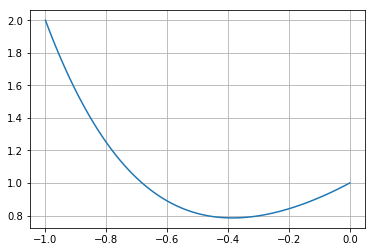

In [6]:
q = np.linspace(-1,0,100)
plt.plot(q,q**4+q**2+q+1)
plt.grid()

In [7]:
x = symbols('x')
f = x**4+x**2+x+1
mean_search(f, x, -1.0, 0.0, 1e-4)

(0.785195254020382, -0.38543701171875, 13)

In [8]:
chord_search(f, x, -1.0, 0.0 , 1e-4)

(0.785195253977440, -0.385437546691033, 30)

In [9]:
newton_search(f, x, -1.0, 0.0, -0.5 , 1e-4)

(0.785195253147150, -0.385458578514434, 6)

In [10]:
from scipy.optimize import minimize
minimize(lambda x: x**4+x**2+x+1, [0.5], bounds =[(-1,0)])

      fun: array([0.78519525])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.5519144e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 14
      nit: 5
   status: 0
  success: True
        x: array([-0.38545862])

# Задание 3

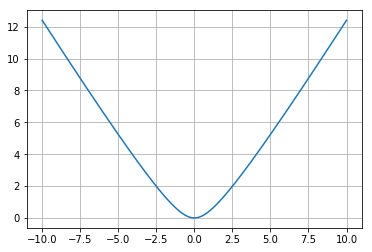

In [11]:
q = np.linspace(-10,10,1000)
plt.figure()
plt.plot(q,q*np.arctan(q)-np.log(1+q**2)/2)
plt.grid()

In [12]:
newton_search(x*atan(x)-log(1+x**2)/2, x, -2.0, 2.0, 2.4, 1e-4)

Method not coverage from current start point


In [13]:
newton_rafton_search(x*atan(x)-log(1+x**2)/2, x, -2.0, 2.0, 2.4 , 1e-4)

(5.78709553307718e-19, 7.60729619055101e-10, 12)

In [14]:
markwardt_search(x*atan(x)-log(1+x**2)/2, x, -2.0, 2.0, 0.5, 2.4, 1e-4)

(5.37765108547048e-11, 1.03707732889573e-5, 10)

# Задание 7

In [15]:
def multimodal_bruteforce(f, a, b, L, eps):
    x = np.linspace(a, b, int(L*(b-a)/(2*eps)))
    return f(x[np.argmin(f(x))]), x[np.argmin(f(x))], int(L*(b-a)/(2*eps))

In [16]:
def linear_search(f, a, b, L, eps):
    count = 0
    x = np.arange(a, b, 0.01)
    y = f(x)
    fa = f(a)
    fb = f(b)
    x0 = (fa - fb + L*(a + b))/(2*L)
    y0 = (fa + fb + L*(a - b))/2
    arr_x = [x0]
    arr_y = [y0]
    while(True):
        min_idx = np.argmin(arr_y)
        fx = f(arr_x[min_idx]) 
        count = count + 1
        px = arr_y[min_idx]
        delta = (fx - px)/(2*L)
        if 2*L*delta <= eps:
             return fx, arr_x[min_idx], count, arr_x, arr_y
             break
        min_x1 = arr_x[min_idx] - delta
        min_x2 = arr_x[min_idx] + delta
        min_y = (fx + px)/2
        arr_x[min_idx] = min_x1
        arr_y[min_idx] = min_y
        arr_x.append(min_x2)
        arr_y.append(min_y) 

# $\frac{cos(x)}{x^2}$ $ x\in[1;12]$ $L = 3$ 

<IPython.core.display.Javascript object>


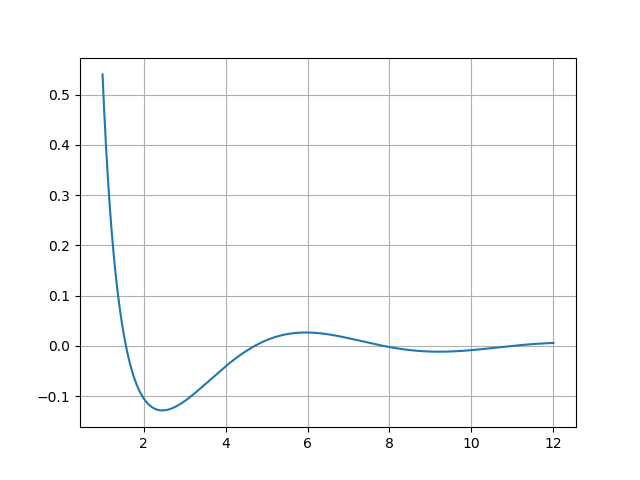

In [30]:
%matplotlib notebook
q = np.linspace(1,12,10000)
plt.figure()
plt.plot(q, np.cos(q)/q**2)
plt.grid()

In [18]:
multimodal_bruteforce(lambda x: np.cos(x)/x**2, 1, 12, 3, 1e-4)

(-0.12832492841815815, 2.4587421741949953, 165000)

In [19]:
_1,_2,_3, arr_x, arr_y = linear_search(lambda x: np.cos(x)/x**2, 1, 12, 3, 1e-4)
#plt.plot(arr_x, arr_y)
_1,_2,_3

(-0.12832492847840807, 2.4587230246739162, 2944)

# $\frac{x}{10} + 2sin(4x)$ $x\in[0;4]$ $L = 8.1$

<IPython.core.display.Javascript object>


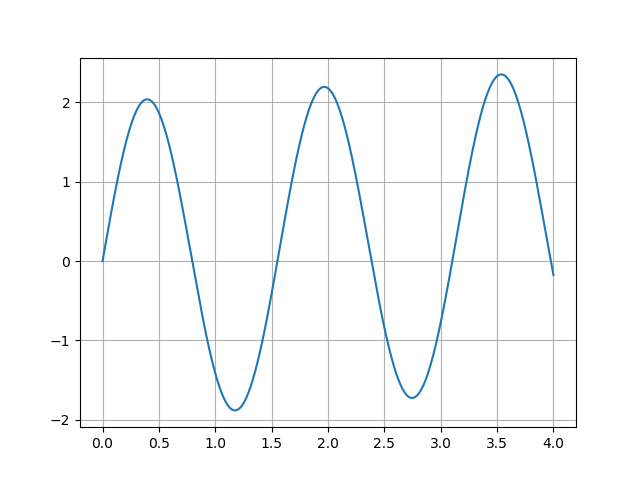

In [29]:
q = np.linspace(0, 4, 10000)
plt.figure()
plt.plot(q, q/10+2*np.sin(4*q))
plt.grid()

In [21]:
multimodal_bruteforce(lambda x: x/10 + 2*np.sin(4*x), 0, 4, 8.1, 1e-4)

(-1.882346527074705, 1.1749774688576402, 161999)

In [22]:
_1,_2,_3, arr_x, arr_y = linear_search(lambda x: x/10 + 2*np.sin(4*x), 0, 4, 8.1, 1e-4)
#plt.plot(arr_x, arr_y)
_1,_2,_3

(-1.8823465274799838, 1.1749738408187367, 604)

# $\frac{cos(10x)}{e^x}$ $x\in[1;5] L=\frac{11}{e}$

<IPython.core.display.Javascript object>


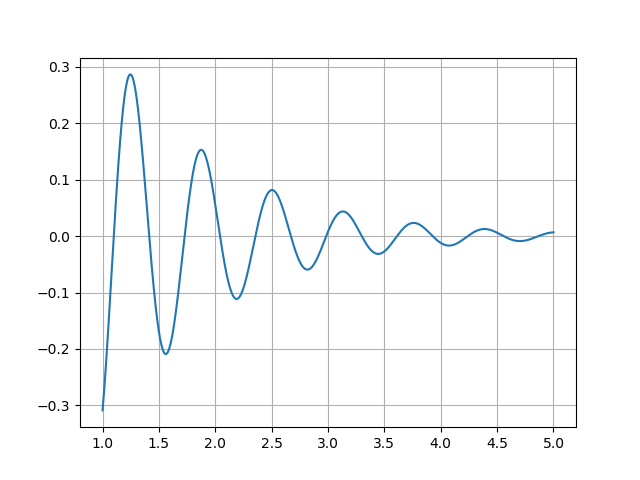

In [31]:
q = np.linspace(1, 5, 10000)
plt.figure()
plt.plot(q, np.cos(10*q)/np.exp(q))
plt.grid()

In [24]:
multimodal_bruteforce(lambda q: np.cos(10*q)/np.exp(q), 1, 5, 4, 1e-4)

(-0.30867716521951294, 1.0, 80000)

In [25]:
_1,_2,_3, arr_x, arr_y = linear_search(lambda q: np.cos(10*q)/np.exp(q), 1, 5, 4, 1e-4)
#plt.plot(arr_x, arr_y)
_1,_2,_3

(-0.3086600439474557, 1.0000074114294324, 42)

# $0.3cos(2x)+2sin(4x)$ $x\in[0;4]$ $L= 9$

<IPython.core.display.Javascript object>


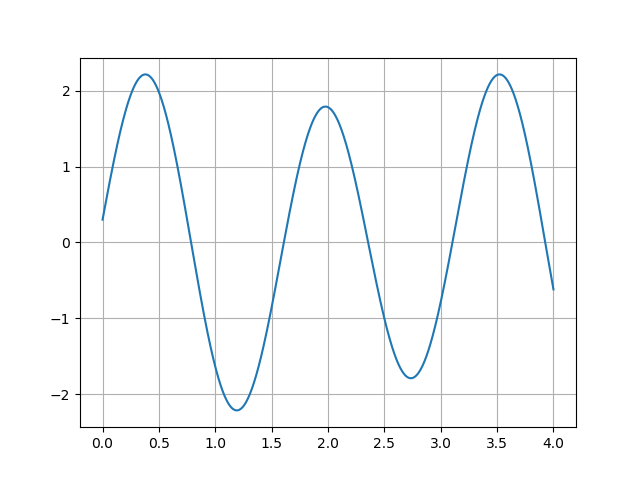

In [32]:
q = np.linspace(0, 4, 10000)
plt.figure()
plt.plot(q, 0.3*np.cos(2*q)+2*np.sin(4*q))
plt.grid()

In [27]:
multimodal_bruteforce(lambda q:  0.3*np.cos(2*q)+2*np.sin(4*q), 0, 4, 9, 1e-4)

(-2.2148718703542123, 1.1910066167034261, 180000)

In [28]:
_1,_2,_3, arr_x, arr_y = linear_search(lambda q:  0.3*np.cos(2*q)+2*np.sin(4*q), 0, 4, 9, 1e-4)
#plt.plot(arr_x, arr_y)
_1,_2,_3

(-2.214871866585913, 1.1909973340492408, 594)